In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import NMF
import seaborn as sns
import matplotlib.pyplot as plt
import pathlib

In [3]:
path = pathlib.WindowsPath('C:\Python\Projects\crystal-phase-prediction\pkl_files\structure_df_hfo2.pkl')
df = pd.read_pickle(path)
df

,structure,name
0,"[[1.38867986 2.3864784 4.36482979] Hf, [3.587...",Ag_HfO2_cat_3.125_222_m.cif
1,"[[1.40181386 2.3944349 4.3885007 ] Hf, [3.606...",Ag_HfO2_cat_3.125_222_o.cif
2,"[[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_p-o.cif
3,"[[-8.73105937 2.58337834 3.5977214 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_t.cif
4,"[[1.37820795 2.39009891 4.37039843] Hf, [3.622...",Ag_HfO2_cat_6.25_122_m.cif
...,...,...
1720,"[[ 1.26076304 -5.11876687 1.26075093] Hf, [ 1...",Zr_HfO2_inter_6.25_212_t.cif
1721,"[[ 1.2262443 -10.12402918 -3.43749088] Hf, ...",Zr_HfO2_inter_6.25_221_m.cif
1722,"[[1.39997305 0.20795941 1.85144277] Hf, [1.451...",Zr_HfO2_inter_6.25_221_o.cif
1723,"[[-8.97250742 -0.20890362 1.50328354] Hf, [-8...",Zr_HfO2_inter_6.25_221_p-o.cif


In [4]:
from matminer.featurizers.structure import XRDPowderPattern
xrd = XRDPowderPattern(two_theta_range=(5, 60))
df = xrd.fit_featurize_dataframe(df, 'structure')
df

,structure,name,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,...,xrd_46,xrd_47,xrd_48,xrd_49,xrd_50,xrd_51,xrd_52,xrd_53,xrd_54,xrd_55
0,"[[1.38867986 2.3864784 4.36482979] Hf, [3.587...",Ag_HfO2_cat_3.125_222_m.cif,1.922885e-124,3.662136e-106,2.274709e-89,4.608160e-74,3.044665e-60,6.560875e-48,4.610990e-37,1.056908e-27,...,0.055240,0.027132,0.002927,1.539337e-03,2.148806e-02,3.620248e-02,3.856953e-02,1.656177e-02,2.202758e-02,4.907713e-03
1,"[[1.40181386 2.3944349 4.3885007 ] Hf, [3.606...",Ag_HfO2_cat_3.125_222_o.cif,3.833496e-120,2.186820e-102,4.377218e-86,3.074328e-71,7.576510e-58,6.551718e-46,1.987962e-35,2.116548e-26,...,0.075043,0.011835,0.001790,1.217813e-02,7.475838e-03,1.704685e-02,4.701839e-02,3.450198e-02,1.086083e-02,1.359166e-02
2,"[[-8.57055872 -7.98390112 -6.2853237 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_p-o.cif,4.614158e-144,6.228116e-123,1.627338e-103,8.231053e-86,8.059163e-70,1.527500e-55,5.604402e-43,3.980468e-32,...,0.102211,0.051378,0.005594,1.090626e-02,6.304034e-03,1.095069e-02,5.834865e-03,4.191295e-04,2.241709e-02,2.862530e-02
3,"[[-8.73105937 2.58337834 3.5977214 ] Hf, [-6...",Ag_HfO2_cat_3.125_222_t.cif,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.192912,0.062303,0.002428,6.835819e-07,8.922782e-13,5.368799e-21,1.488995e-31,1.903481e-44,1.121612e-59,3.046321e-77
4,"[[1.37820795 2.39009891 4.37039843] Hf, [3.622...",Ag_HfO2_cat_6.25_122_m.cif,3.685323e-13,1.215938e-08,1.336709e-05,4.896124e-04,5.975271e-04,2.429700e-05,3.291830e-08,1.485977e-12,...,0.053768,0.027731,0.003637,3.828243e-03,2.363149e-02,3.321684e-02,3.445653e-02,1.697082e-02,2.246895e-02,5.644233e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,"[[ 1.26076304 -5.11876687 1.26075093] Hf, [ 1...",Zr_HfO2_inter_6.25_212_t.cif,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.230393,0.019318,0.000017,9.694532e-11,3.008175e-18,4.998223e-28,4.432960e-40,2.097766e-54,5.296409e-71,7.134511e-90
1721,"[[ 1.2262443 -10.12402918 -3.43749088] Hf, ...",Zr_HfO2_inter_6.25_221_m.cif,2.157189e-123,3.921250e-105,2.264441e-88,4.154300e-73,2.421224e-59,4.483036e-47,2.636998e-36,4.927738e-27,...,0.054545,0.010417,0.000261,1.452075e-03,2.752624e-02,4.467599e-02,2.812541e-02,1.953147e-02,1.280853e-02,1.011006e-02
1722,"[[1.39997305 0.20795941 1.85144277] Hf, [1.451...",Zr_HfO2_inter_6.25_221_o.cif,1.628877e-14,1.055123e-09,2.353980e-06,1.808785e-04,4.786917e-04,4.363244e-05,1.369771e-07,1.481054e-11,...,0.050209,0.004052,0.004118,1.054985e-02,1.464532e-02,3.429327e-02,3.956431e-02,2.234222e-02,1.562678e-02,1.100528e-02
1723,"[[-8.97250742 -0.20890362 1.50328354] Hf, [-8...",Zr_HfO2_inter_6.25_221_p-o.cif,5.637057e-15,8.154305e-10,3.094216e-06,3.079948e-04,8.042024e-04,5.508285e-05,9.896843e-08,4.664510e-12,...,0.092145,0.024087,0.001631,2.736708e-03,9.266588e-04,2.672073e-03,4.030183e-03,1.146990e-03,2.654477e-02,5.130519e-02


In [5]:
labels_true = pd.read_pickle(r'C:\Python\Projects\crystal-phase-prediction\data_labels\labels_hfo2.pkl')
labels_true = labels_true.labels_0_4
labels_true = labels_true.values

In [35]:
from sklearn.utils import shuffle
X = df.iloc[:,2:]
# X, y_true = shuffle(X, y_true, random_state=0)
X

,xrd_0,xrd_1,xrd_2,xrd_3,xrd_4,xrd_5,xrd_6,xrd_7,xrd_8,xrd_9,...,xrd_46,xrd_47,xrd_48,xrd_49,xrd_50,xrd_51,xrd_52,xrd_53,xrd_54,xrd_55
0,1.922885e-124,3.662136e-106,2.274709e-89,4.608160e-74,3.044665e-60,6.560875e-48,4.610990e-37,1.056908e-27,7.901144e-20,1.926430e-13,...,0.055240,0.027132,0.002927,1.539337e-03,2.148806e-02,3.620248e-02,3.856953e-02,1.656177e-02,2.202758e-02,4.907713e-03
1,3.833496e-120,2.186820e-102,4.377218e-86,3.074328e-71,7.576510e-58,6.551718e-46,1.987962e-35,2.116548e-26,7.907060e-19,1.036499e-12,...,0.075043,0.011835,0.001790,1.217813e-02,7.475838e-03,1.704685e-02,4.701839e-02,3.450198e-02,1.086083e-02,1.359166e-02
2,4.614158e-144,6.228116e-123,1.627338e-103,8.231053e-86,8.059163e-70,1.527500e-55,5.604402e-43,3.980468e-32,5.472626e-23,1.456512e-15,...,0.102211,0.051378,0.005594,1.090626e-02,6.304034e-03,1.095069e-02,5.834865e-03,4.191295e-04,2.241709e-02,2.862530e-02
3,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,9.881313e-322,...,0.192912,0.062303,0.002428,6.835819e-07,8.922782e-13,5.368799e-21,1.488995e-31,1.903481e-44,1.121612e-59,3.046321e-77
4,3.685323e-13,1.215938e-08,1.336709e-05,4.896124e-04,5.975271e-04,2.429700e-05,3.291830e-08,1.485977e-12,2.396561e-18,3.260115e-13,...,0.053768,0.027731,0.003637,3.828243e-03,2.363149e-02,3.321684e-02,3.445653e-02,1.697082e-02,2.246895e-02,5.644233e-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1720,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.191786e-312,...,0.230393,0.019318,0.000017,9.694532e-11,3.008175e-18,4.998223e-28,4.432960e-40,2.097766e-54,5.296409e-71,7.134511e-90
1721,2.157189e-123,3.921250e-105,2.264441e-88,4.154300e-73,2.421224e-59,4.483036e-47,2.636998e-36,4.927738e-27,2.925403e-19,5.517268e-13,...,0.054545,0.010417,0.000261,1.452075e-03,2.752624e-02,4.467599e-02,2.812541e-02,1.953147e-02,1.280853e-02,1.011006e-02
1722,1.628877e-14,1.055123e-09,2.353980e-06,1.808785e-04,4.786917e-04,4.363244e-05,1.369771e-07,1.481054e-11,5.698369e-17,2.015100e-12,...,0.050209,0.004052,0.004118,1.054985e-02,1.464532e-02,3.429327e-02,3.956431e-02,2.234222e-02,1.562678e-02,1.100528e-02
1723,5.637057e-15,8.154305e-10,3.094216e-06,3.079948e-04,8.042024e-04,5.508285e-05,9.896843e-08,4.664510e-12,5.814138e-18,1.329418e-13,...,0.092145,0.024087,0.001631,2.736708e-03,9.266588e-04,2.672073e-03,4.030183e-03,1.146990e-03,2.654477e-02,5.130519e-02


In [21]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)


In [8]:
wcss=[]

#we always assume the max number of cluster would be 10
#you can judge the number of clusters by doing averaging
###Static code to get max no of clusters

for i in range(1,11):
    kmeans = KMeans(n_clusters= i, init='k-means++', random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

    #inertia_ is the formula used to segregate the data points into clusters

<IPython.core.display.Javascript object>


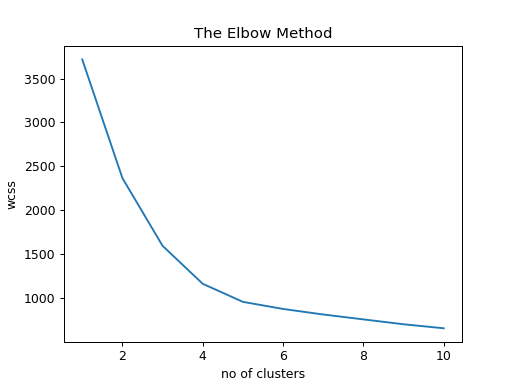

In [9]:
plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.show()

In [36]:
model = NMF(n_components=5, init='random', random_state=0, max_iter = 2000)
nmf_features_W = model.fit_transform(X)
nmf_componentes_H = model.components_

In [37]:
nmf_df = pd.DataFrame(nmf_componentes_H.T)
W_df = pd.DataFrame(nmf_features_W)
W_df # weights represent abundence of phase at a given nominal composition


,0,1,2,3,4
0,0.000000,0.249817,0.045155,0.019193,0.005435
1,0.054223,0.000000,0.000000,0.263745,0.047770
2,0.062303,0.000621,0.000710,0.019674,0.197850
3,0.037819,0.000000,0.000110,0.021535,0.298068
4,0.001702,0.262737,0.042062,0.013875,0.009451
...,...,...,...,...,...
1720,0.092510,0.000000,0.003316,0.045032,0.189833
1721,0.000853,0.015985,0.080167,0.000000,0.003098
1722,0.053288,0.052387,0.001964,0.252399,0.012446
1723,0.134991,0.065818,0.000000,0.000000,0.079759


In [38]:
W_df.describe()

,0,1,2,3,4
count,1725.000000,1725.000000,1725.000000,1725.000000,1725.000000
mean,0.050239,0.068238,0.017308,0.062031,0.096115
std,0.043522,0.086947,0.026732,0.096454,0.102880
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.001455,0.002139,0.000000,0.004773,0.007639
50%,0.050879,0.022435,0.000889,0.018417,0.059551
75%,0.078297,0.109572,0.041115,0.034470,0.164256
max,0.199434,0.386475,0.082798,0.291975,0.367636


In [39]:
kmeans = KMeans(n_clusters=5)
nmf_labels = kmeans.fit_predict(W_df)

In [41]:
from sklearn import metrics
metrics.silhouette_score(X, nmf_labels, metric='l2')

0.3764181740717941

In [42]:
nmf_labels

array([0, 2, 1, ..., 2, 1, 1])

In [43]:
W_df['cluster'] = nmf_labels
W_df['labels'] = labels_true
W_df.columns = ['x1','x2','x3','x4','x5','cluster', 'labels']
W_df.head(40)

,x1,x2,x3,x4,x5,cluster,labels
0,0.000000,0.249817,0.045155,0.019193,0.005435,0,m
1,0.054223,0.000000,0.000000,0.263745,0.047770,2,o
2,0.062303,0.000621,0.000710,0.019674,0.197850,1,p-o
3,0.037819,0.000000,0.000110,0.021535,0.298068,3,t
4,0.001702,0.262737,0.042062,0.013875,0.009451,0,m
5,0.070504,0.000729,0.001528,0.018992,0.182807,1,p-o
6,0.101521,0.083218,0.006663,0.002991,0.110288,1,unknown
7,0.000000,0.209895,0.051670,0.013937,0.007639,0,m
8,0.055849,0.002415,0.000000,0.250868,0.048804,2,o
9,0.067754,0.000361,0.001636,0.018326,0.186850,1,p-o


In [31]:
# look at the above table
W_df = W_df.replace({'m': 0, 'p-o': 3, 'o': 1, 't': 2, 'unknown': 4})

In [32]:
W_df


,x1,x2,x3,x4,cluster,labels
0,0.775012,0.047327,0.000000,0.050220,0,0
1,0.000000,0.095529,0.000000,1.088070,1,1
2,0.032545,0.679278,0.001332,0.222479,2,3
3,0.000000,0.766025,0.000000,0.000000,2,2
4,0.748305,0.067834,0.009794,0.048723,0,0
...,...,...,...,...,...,...
1720,0.000000,0.753013,0.000000,0.000000,2,2
1721,0.810011,0.036386,0.000000,0.001331,0,0
1722,0.097250,0.075679,0.000000,1.018056,1,1
1723,0.039300,0.746314,0.000000,0.098705,2,4


In [33]:
from sklearn.metrics import accuracy_score
accuracy_score(W_df['labels'], W_df['cluster'])

0.5982608695652174

In [34]:
from sklearn.metrics import confusion_matrix
confusion_matrix(W_df['labels'], W_df['cluster'])

array([[380,   0,   0,   0,  80],
       [  0, 345,   0,   0,   0],
       [  1,   0, 221,  20,   3],
       [  0,   0, 332,  72,   0],
       [  9,   5, 190,  53,  14]], dtype=int64)

<IPython.core.display.Javascript object>


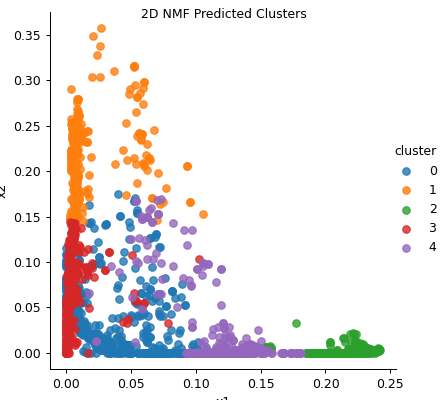

Text(0.5, 0.98, '2D NMF Predicted Clusters')

In [18]:
dfPCA2 = W_df[['x1', 'x2', 'cluster']]
lm = sns.lmplot(data=W_df, x='x1', y='x2',hue='cluster', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D NMF Predicted Clusters", fontsize=10)

<IPython.core.display.Javascript object>


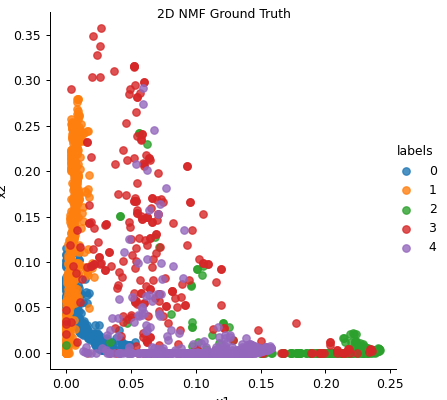

Text(0.5, 0.98, '2D NMF Ground Truth')

In [19]:
lm = sns.lmplot(data=W_df, x='x1', y='x2',hue='labels', fit_reg=False, legend=True, legend_out=True)
# Access the figure
fig = lm.fig 
fig.suptitle("2D NMF Ground Truth", fontsize=10)

In [44]:
import plotly.express as px
fig = px.scatter_3d(
    W_df, x='x1', y='x2', z='x3', color=W_df['labels'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Ground Truth'
)
fig.show()

In [30]:
fig = px.scatter_3d(
    W_df, x='x1', y='x2', z='x3', color=W_df['cluster'],
    labels={'x1': 'PC 1', 'x2': 'PC 2', 'x3': 'PC 3'}, title='PCA 3D Prediction'
)
fig.show()